In [4]:
#importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#importing the required dataset.
dataset_train = pd.read_csv(r"C:\Users\nEW u\Desktop\dataset\Google_Stock_Price_Train.csv")


## Data preprocessing.

### Taking only the opening stock price.

In [6]:
training_set = dataset_train.iloc[:, 1:2].values 

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
training_set.size

1258

In [9]:
from sklearn.preprocessing import MinMaxScaler

### Normalising the data in the range 0 to 1.
### Normalistion formula, x = (x-x_min)/(x_max-x_min)

In [10]:
sc = MinMaxScaler(feature_range = (0,1))

In [11]:
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled 

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
training_set_scaled.mean()

0.47360263611199216

### Creating a data structure with 60 timesteps and 1 output.

In [14]:
x_train = [] #containing input(input data structure - 60 timesteps)
y_train = [] #containing output(61st data)

In [15]:
for i in range(60 , 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train) # list to array.

In [16]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [17]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping.

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
# expects 3d array

In [19]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [20]:
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [21]:
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
regressor = Sequential() #initialising the RNN

In [23]:
regressor.add(LSTM(units =  50, return_sequences = True, input_shape = (x_train.shape[1],1)))
# Adding the first LSTM layer.

In [24]:
regressor.add(Dropout(0.2))
# to avoid over fitting.

In [25]:
# second LSTM layer and dropout.
regressor.add(LSTM(units =  50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
# third LSTM layer and dropout.
regressor.add(LSTM(units =  50, return_sequences = True))
regressor.add(Dropout(0.2))

In [27]:
# fourth LSTM layer and dropout.
# return_sequences by default = false(last layer)
regressor.add(LSTM(units =  50))
regressor.add(Dropout(0.2))

In [28]:
# output layer
regressor.add(Dense(units = 1))

In [29]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
# training the neural network.
# Epochs = how many times the data forward propagates and backward propagates with weights.
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0471
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - 

Epoch 97/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0013


In [31]:
# real stock price (test data).
dataset_test = pd.read_csv(r"C:\Users\nEW u\Desktop\dataset\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values 

In [33]:
#getting the prdicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:] .values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60 , 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

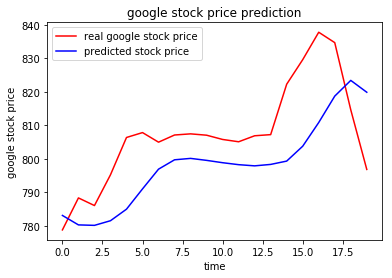

In [34]:
#plotting the real vs predicted stock price.
plt.plot(real_stock_price, color = 'red', label = 'real google stock price')
plt.plot(predicted_stock_price, color='blue', label = 'predicted stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()